# **Praktikum Kecerdasan Buatan**
## **Post Test 6 - Unsupervised Learning**
#### Tjeng, Ivan Cahyadi, 2009106146
---

## **Import Library**

In [127]:
import pandas as pd
import numpy as np

# Visualisasi Data
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler # Standardisasi
from sklearn.preprocessing import MinMaxScaler # Normalisasi
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding

# K-Means Clustering
from sklearn.cluster import KMeans

# Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage, complete
from sklearn.cluster import AgglomerativeClustering

## **Baca Dataset**
##### [Pokemon with stats](https://www.kaggle.com/datasets/abcsds/pokemon)

In [128]:
pokemon_dataset = pd.read_csv('Pokemon.csv')

## **5 Data Teratas**

In [129]:
pokemon_dataset.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## **5 Data Terbawah**

In [130]:
pokemon_dataset.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


## **Jumlah Baris dan Kolom pada Dataset**

In [131]:
pokemon_dataset.shape

(800, 13)

## **Informasi Dataset**

In [132]:
pokemon_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## **Ringkasan Statistik Dataset**

In [133]:
pokemon_dataset[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


## **Korelasi antar Attribute Dataset**

In [134]:
pokemon_dataset[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']].corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.326715
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,1.000000


## **Melihat Jumlah Data yang memiliki nilai Null pada setiap Atributnya**

In [135]:
pokemon_dataset.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## **Melihat Jumlah Data Duplikat**

In [136]:
pokemon_dataset.duplicated().sum()

0

## **Pie Chart untuk Melihat Persentase Pokemon Legendaris dan Non-Legendaris**

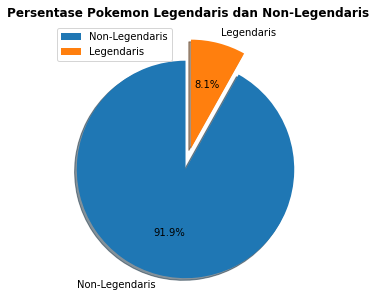

In [137]:
plt.figure(figsize = (5,5))
plt.pie(pokemon_dataset['Legendary'].value_counts(), labels = ['Non-Legendaris', 'Legendaris'], startangle = 90, autopct = '%.1f%%', shadow = True, explode = [0.1, 0.1])
plt.title('Persentase Pokemon Legendaris dan Non-Legendaris', fontweight = 'bold')
plt.legend()
plt.show()

## **Hapus Kolom yang Tidak Diperlukan**

In [138]:
pokemon_dataset_dropped_column = pokemon_dataset.sort_values('Legendary').reset_index().copy()

In [139]:
pokemon_dataset_dropped_column.drop(['index', '#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack',	'Defense',	'Speed', 'Generation'], axis = 1, inplace = True)

In [140]:
pokemon_dataset_dropped_column.head()

,Total,Sp. Atk,Sp. Def,Legendary
0,318,65,65,False
1,594,132,105,False
2,510,45,85,False
3,535,130,90,False
4,515,80,95,False


# **Normalisasi**

In [141]:
normalized_pokemon_dataset = pokemon_dataset_dropped_column.copy()

In [142]:
minMaxScaler = MinMaxScaler()

In [143]:
normalized_pokemon_dataset = pd.DataFrame(minMaxScaler.fit_transform(normalized_pokemon_dataset[['Total',	'Sp. Atk', 'Sp. Def']]), columns = ['Total',	'Sp. Atk', 'Sp. Def'])
normalized_pokemon_dataset = normalized_pokemon_dataset.join(pokemon_dataset_dropped_column['Legendary'])
normalized_pokemon_dataset

,Total,Sp. Atk,Sp. Def,Legendary
0,0.230000,0.298913,0.214286,False
1,0.690000,0.663043,0.404762,False
2,0.550000,0.190217,0.309524,False
3,0.591667,0.652174,0.333333,False
4,0.558333,0.380435,0.357143,False
...,...,...,...,...
795,0.700000,0.461957,0.333333,True
796,1.000000,0.782609,0.380952,True
797,0.833333,0.782609,0.333333,True
798,0.833333,0.760870,0.333333,True


## **Encode Attribute 'Legendary' with Ordinal Encoder**

In [144]:
encoded_pokemon_dataset = normalized_pokemon_dataset.copy()

In [145]:
ordinalEncoder = OrdinalEncoder()

In [146]:
encoded_pokemon_dataset['Legendary'] = ordinalEncoder.fit_transform(encoded_pokemon_dataset[['Legendary']]).astype('int64')

In [147]:
encoded_pokemon_dataset.head()

,Total,Sp. Atk,Sp. Def,Legendary
0,0.230000,0.298913,0.214286,0
1,0.690000,0.663043,0.404762,0
2,0.550000,0.190217,0.309524,0
3,0.591667,0.652174,0.333333,0
4,0.558333,0.380435,0.357143,0


## **K-Means Clustering**

In [148]:
data_points = encoded_pokemon_dataset[['Sp. Atk', 'Sp. Def']] # atribut yang akan dilatih

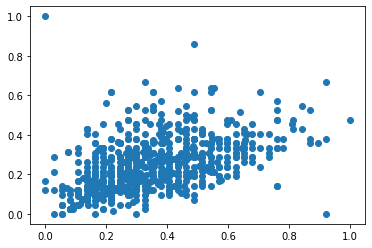

In [149]:
plt.scatter(data_points['Sp. Atk'], data_points['Sp. Def'])

In [150]:
kmeans_model = KMeans(n_clusters = 2)

In [151]:
kmeans_model.fit(data_points)

KMeans(n_clusters=2)

In [152]:
labels = kmeans_model.labels_
labels

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,

In [153]:
df_kmeans = ds_kmeans = pd.DataFrame({
    'labels': labels,
    'target': encoded_pokemon_dataset['Legendary'].to_numpy()
})

In [154]:
crosstab = pd.crosstab(df_kmeans['labels'], df_kmeans['target'])
crosstab

target,0,1
labels,,
0,480,1
1,255,64


In [155]:
centroid = kmeans_model.cluster_centers_
centroid

array([[0.22855464, 0.18115038],
       [0.51158512, 0.34667861]])

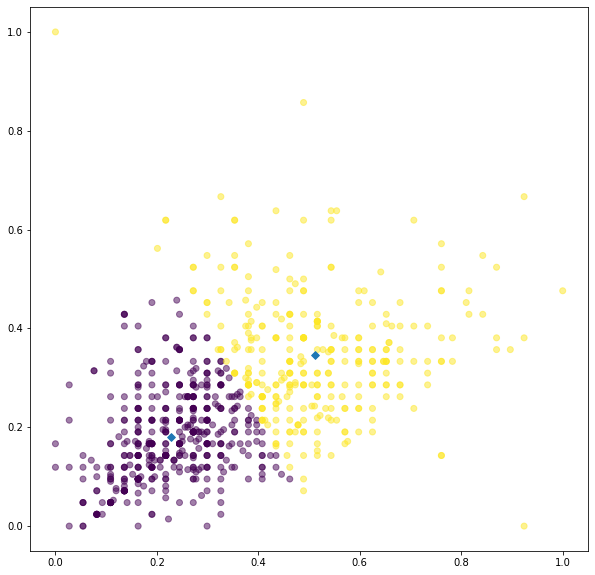

In [156]:
plt.figure(figsize = (10,10))
plt.scatter(data_points['Sp. Atk'], data_points['Sp. Def'], alpha = .5, c = labels)
plt.scatter(centroid[:,0], centroid[:,1], marker = 'D', s = 30)
plt.show()

## **Hierarchical Clustering**

In [157]:
points_linkage = normalized_pokemon_dataset.iloc[:,[0, 1]].values
points_complete = normalized_pokemon_dataset.iloc[:,[0, 2]].values

In [158]:
hr_linkage = linkage(points_linkage, method = 'ward')
hr_complete = complete(points_complete)

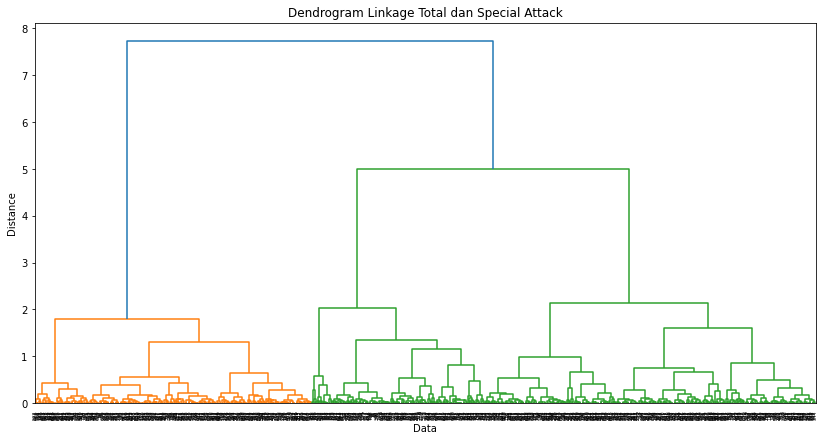

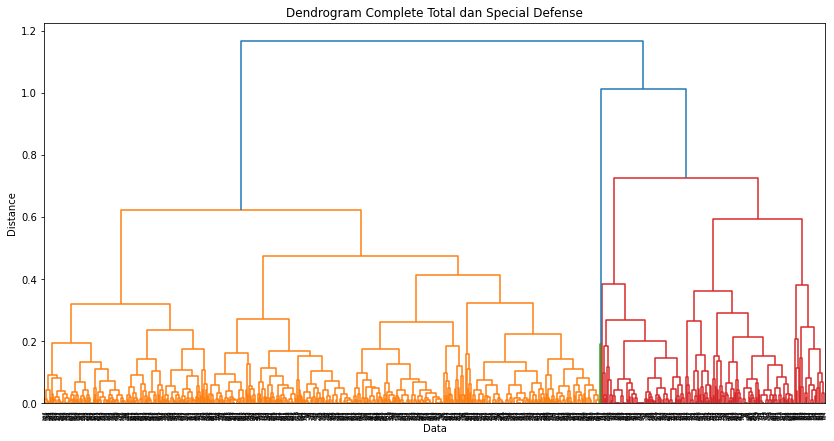

In [159]:
plt.figure(1, figsize = (14,7))
dendrogram(hr_linkage)
plt.title('Dendrogram Linkage Total dan Special Attack')
plt.xlabel('Data')
plt.ylabel('Distance')

plt.figure(2, figsize = (14,7))
dendrogram(hr_complete)
plt.title('Dendrogram Complete Total dan Special Defense')
plt.xlabel('Data')
plt.ylabel('Distance')

plt.show()

In [165]:
ag_linkage = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage='ward')
ag_complete = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean')

In [166]:
pr_linkage = ag_linkage.fit_predict(points_linkage)
pr_complete = ag_complete.fit_predict(points_complete)

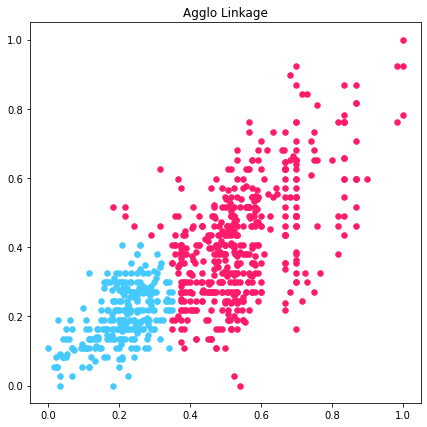

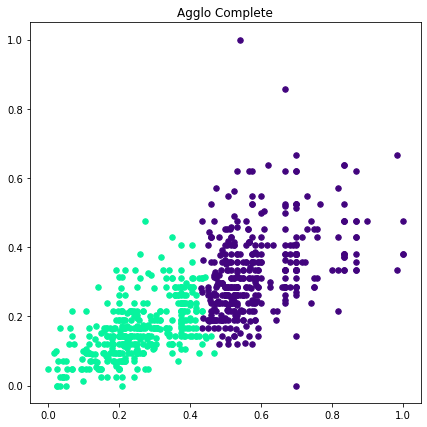

In [167]:
plt.figure(1, figsize = (7,7))
plt.scatter(points_linkage[pr_linkage==0,0], points_linkage[pr_linkage==0,1], s=30, c='#ff1b6b')
plt.scatter(points_linkage[pr_linkage==1,0], points_linkage[pr_linkage==1,1], s=30, c='#45caff')
plt.title('Agglo Linkage')

plt.figure(2, figsize = (7,7))
plt.scatter(points_complete[pr_complete==0,0], points_complete[pr_complete==0,1], s=30, c='#42047e')
plt.scatter(points_complete[pr_complete==1,0], points_complete[pr_complete==1,1], s=30, c='#07f49e')
plt.title('Agglo Complete')

plt.show()